# Continuum fitting

$\mathrm{LiMe}$ provides basic functions to fit the continuum with a polynomial. We will use the spectrum from **GP121903** to demonstrate this operation:


/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


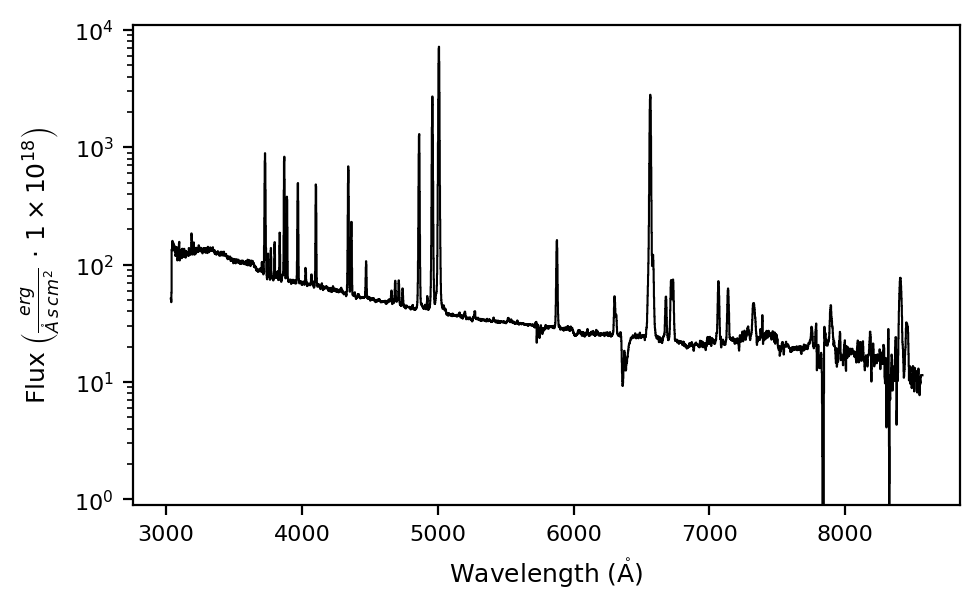

In [1]:
import numpy as np
from astropy.io import fits
from pathlib import Path
import lime

# State the input files
obsFitsFile = '../0_resources/spectra/gp121903_osiris.fits'
cfgFile = '../0_resources/long-slit.toml'

# Spectrum parameters
z_obj = 0.19531
norm_flux = 1e-18

# Create the observation object
gp_spec = lime.Spectrum.from_file(obsFitsFile, instrument='osiris', redshift=z_obj, norm_flux=norm_flux)
gp_spec.plot.spectrum(rest_frame=True, log_scale=True)

As we can see from the plot above, this object has a week continuum compared to the emission lines. To mask these features we are going to do an iterative process with the $\tt{lime.Spectrum.fit.continuum}$ function:

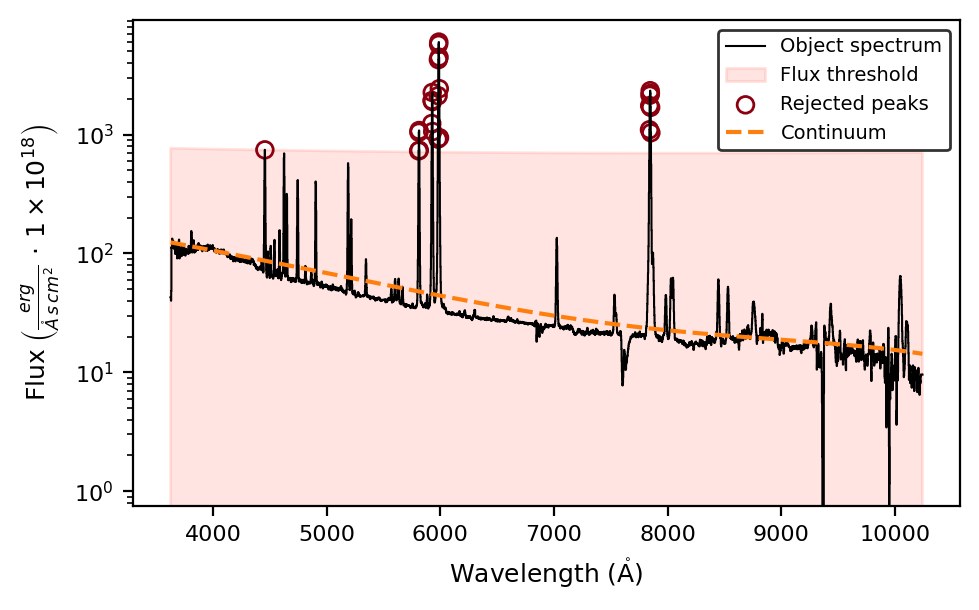

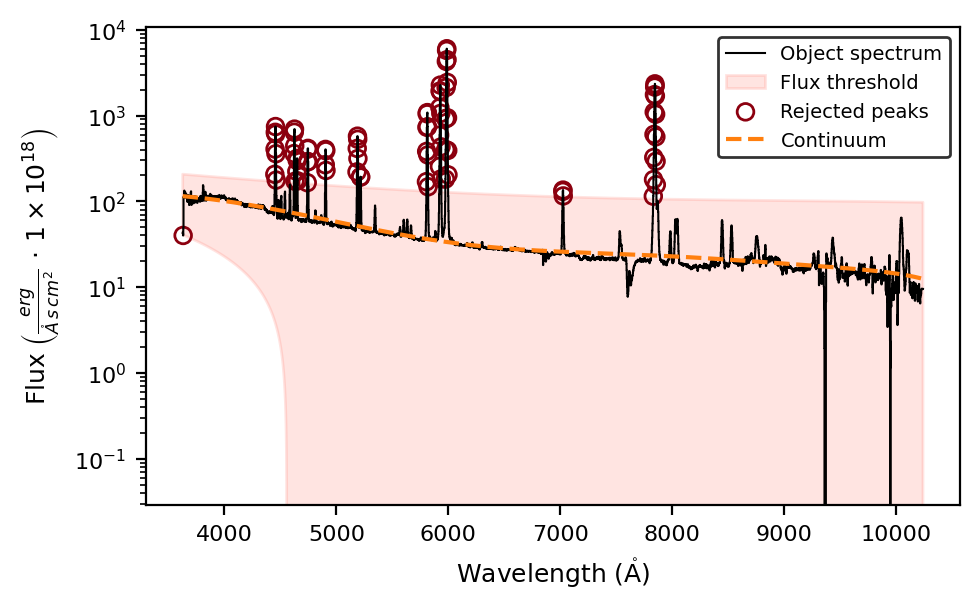

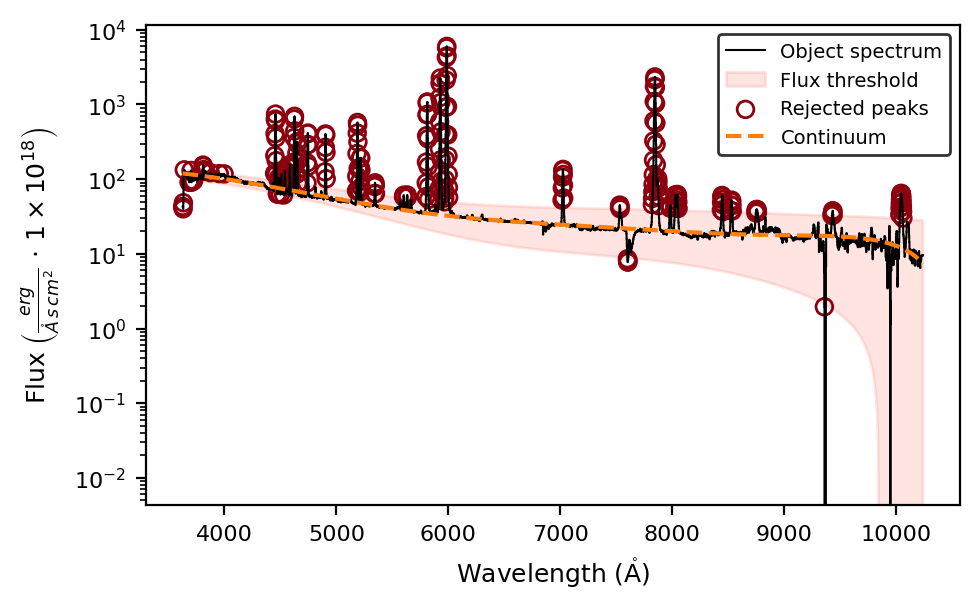

In [2]:
gp_spec.fit.continuum(degree_list=[3, 6, 6], emis_threshold=[3, 2, 1.5], plot_steps=True, log_scale=True)

By setting ``plot_steps=True`` we can visualize the steps of the iteration. The other arguments provide additional tools to adjust the continuum fitting:

* The ``degree_list`` sets the number of iterations and the degree of the polynomial.
* The ``emis_threshold`` sets the intensity threshold for rejected pixels (marked in purple on the plots). You can also set an ``abs_threshold`` to define a lower intensity threshold. Otherwise, the same threshold will apply for pixels above and below the continuum fitting.
* The ``smooth_scale`` argument is the length in pixels for the [convolve function](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html). Smoothing the spectrum can provide a more robust estimation of the continuum.


The ``lime.Spectrum.cont`` variable stores the fitted continuum array, while the ``lime.Spectrum.cont_std`` provides the standard deviation between the observed spectrum and the fitted one.

In [3]:
print(gp_spec.cont)
print(gp_spec.cont_std)

[119.24158210981295 119.14751482372276 119.0532858338729 ...
 7.463363476396353 7.401425013028529 7.339188641922192]
4.099014712009923


These arrays can be plotted using the $\tt{lime.Spectrum.plot.spectrum}$ function:

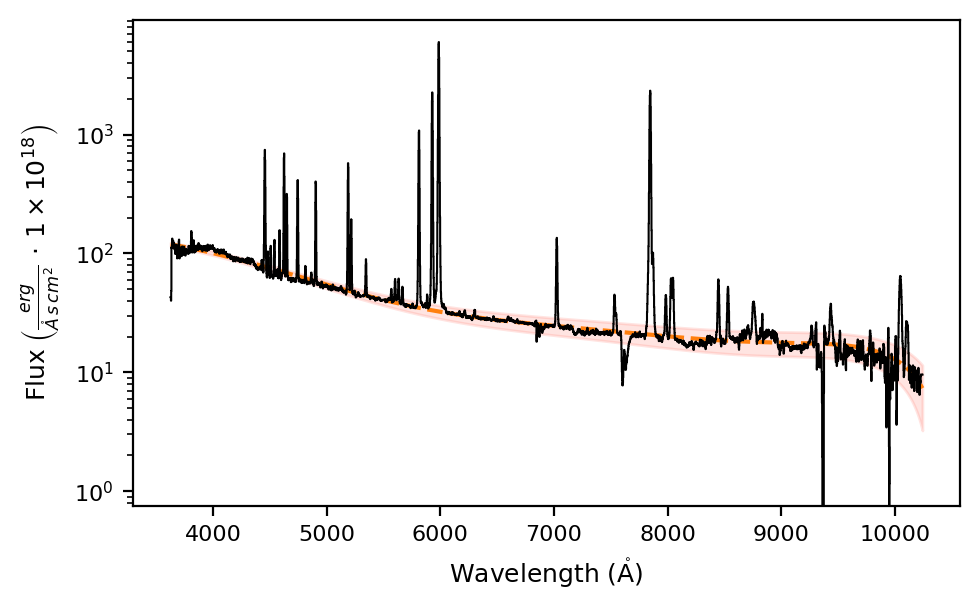

In [4]:
gp_spec.plot.spectrum(show_cont=True, log_scale=True)

where the dashed line corresponds to ``lime.Spectrum.cont`` and the shaded area represents ``lime.Spectrum.cont_std``.

## Takeaways
* $\mathrm{LiMe}$ provides an iterative function $\tt{lime.Spectrum.fit.continuum}$ to fit the continuum.  
* The user can provide a list with the degrees of the polynomials and the intensity thresholds for the emission and/or absorption features to be excluded at each iteration.  
* The fitted continuum is stored in the $\tt{lime.Spectrum.cont}$ attribute and is used in tasks such as line detection.  
* The function arguments can be adjusted to meet the user’s needs. You can read the function documentation in the [API](https://lime-stable.readthedocs.io/en/latest/reference/API.html).